In [36]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import cluster
from sklearn import mixture

In [2]:
df = pd.read_csv('data/snsdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [3]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
df = df.drop(['gradyear','gender','age','friends'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   basketball    30000 non-null  int64
 1   football      30000 non-null  int64
 2   soccer        30000 non-null  int64
 3   softball      30000 non-null  int64
 4   volleyball    30000 non-null  int64
 5   swimming      30000 non-null  int64
 6   cheerleading  30000 non-null  int64
 7   baseball      30000 non-null  int64
 8   tennis        30000 non-null  int64
 9   sports        30000 non-null  int64
 10  cute          30000 non-null  int64
 11  sex           30000 non-null  int64
 12  sexy          30000 non-null  int64
 13  hot           30000 non-null  int64
 14  kissed        30000 non-null  int64
 15  dance         30000 non-null  int64
 16  band          30000 non-null  int64
 17  marching      30000 non-null  int64
 18  music         30000 non-null  int64
 19  rock          30000 non-n

In [5]:
scaler = preprocessing.StandardScaler()
scaler.fit(df)
df_norm = scaler.transform(df)

In [6]:
df_norm[0][0]

-0.3322172643985876

In [7]:
k_m = cluster.KMeans(n_clusters=9, random_state=42)
k_m.fit(df_norm)
k_m.inertia_

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1033997689

In [8]:
y_pred = k_m.predict(df_norm)
y_pred

array([0, 3, 0, ..., 0, 0, 0], dtype=int32)

In [9]:
df_y = pd.DataFrame(y_pred, columns = ['cluster'])
df_y.groupby('cluster')['cluster'].count().sort_values(ascending=False)

cluster
0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: cluster, dtype: int64

In [10]:
inertia = pd.DataFrame(range(3,10), columns=['clusters'])
inertia['inertia']=0
inertia

,clusters,inertia
0,3,0
1,4,0
2,5,0
3,6,0
4,7,0
5,8,0
6,9,0


In [11]:
for i in range(3, 10):
    k_m = cluster.KMeans(n_clusters=i)
    k_m.fit(df_norm)
    inertia.loc[i-3,'inertia'] = k_m.inertia_
    #print(i, k_m.inertia_)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<AxesSubplot: xlabel='clusters'>

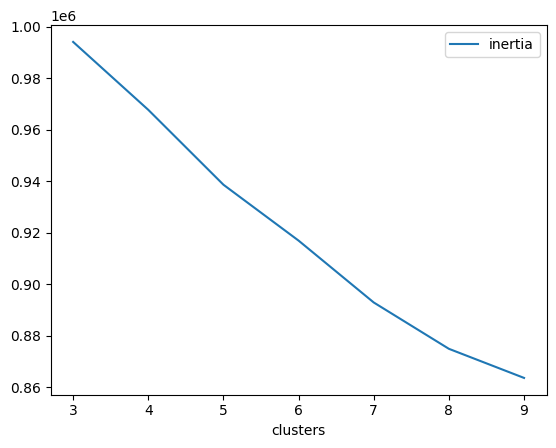

In [12]:
inertia.plot(x='clusters', y='inertia')

In [13]:
inertia['silhouette']=0

In [15]:
for i in range(3, 10):
    k_m = cluster.KMeans(n_clusters=i)
    k_m.fit(df_norm)
    inertia.loc[i-3,'silhouette'] = metrics.silhouette_score(df_norm, k_m.labels_)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

In [16]:
inertia

,clusters,inertia,silhouette
0,3,994115.203019,0.325282
1,4,967751.278132,0.310382
2,5,938689.288642,0.303816
3,6,916996.551987,0.302978
4,7,892984.220573,0.270241
5,8,875001.151651,0.313605
6,9,863704.983616,0.280123


<AxesSubplot: xlabel='clusters'>

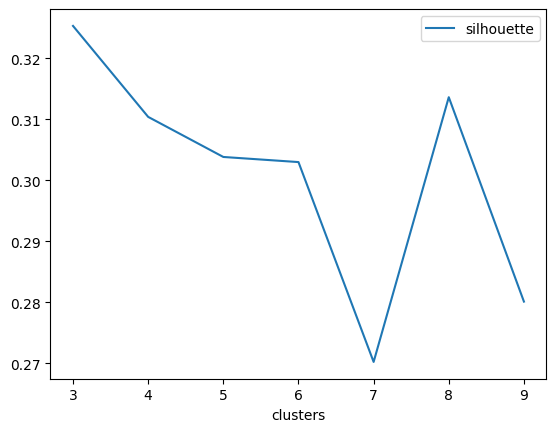

In [17]:
inertia.plot(x='clusters', y='silhouette')

In [18]:
k_m3 = cluster.KMeans(n_clusters=3)
k_m3.fit(df_norm)
df['cluster'] = k_m3.predict(df_norm)
df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [35]:
df_group = df.groupby('cluster').agg('sum').T

pd.DataFrame(list(df_group[0].sort_values(ascending=False).head(10).index) + \
list(df_group[1].sort_values(ascending=False).head(10).index) + \
list(df_group[2].sort_values(ascending=False).head(10).index)).value_counts()

god           3
dance         3
music         3
hair          3
football      2
shopping      2
rock          2
band          2
cute          2
basketball    1
drugs         1
kissed        1
mall          1
die           1
sex           1
church        1
soccer        1
dtype: int64

In [37]:
mix = mixture.GaussianMixture(n_components=3, random_state=42)
mix.fit(df_norm)
y_pred = mix.predict(df_norm)
pd.DataFrame(y_pred).value_counts()

0    23426
1     6573
2        1
dtype: int64

In [39]:
df['cluster'] = y_pred
df[df['cluster']==2].sum().sort_values(ascending=False)

blonde          327
sex              22
hair             12
god              10
drunk             6
death             6
die               6
dress             2
football          2
cluster           2
cute              1
clothes           1
sexy              1
dance             1
band              1
rock              1
swimming          1
jesus             1
shopping          0
mall              0
hollister         0
abercrombie       0
drugs             0
basketball        0
bible             0
church            0
marching          0
kissed            0
hot               0
sports            0
tennis            0
baseball          0
cheerleading      0
volleyball        0
softball          0
soccer            0
music             0
dtype: int64